<a href="https://colab.research.google.com/github/niteshavagabond/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Nitesh_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Closing Prediction


## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [105]:
# importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [65]:
# loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction - Nitesh Verma/data_YesBank_StockPrices.csv') 

In [66]:
# looking at first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [67]:
# looking at last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [69]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [70]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,185,"[Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0..."
1,Open,float64,0,0.0,183,"[13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68..."
2,High,float64,0,0.0,184,"[14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1..."
3,Low,float64,0,0.0,183,"[11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58..."
4,Close,float64,0,0.0,185,"[12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3..."


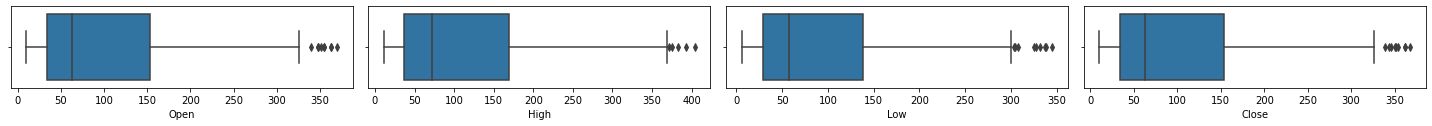

In [71]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

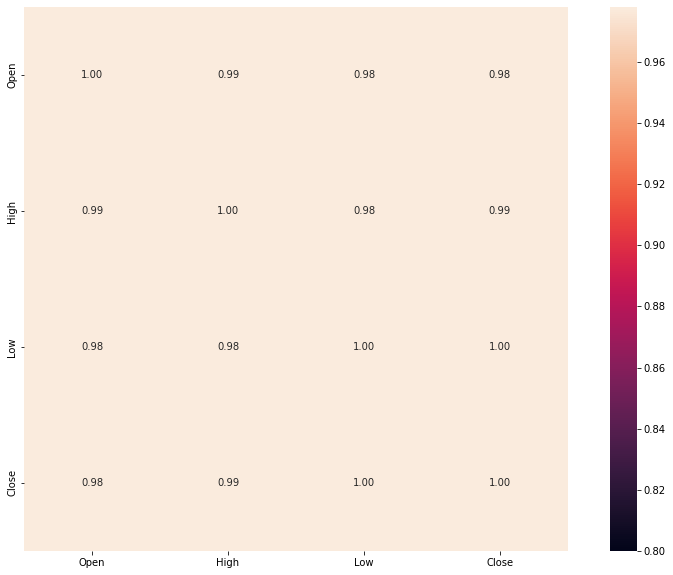

In [72]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

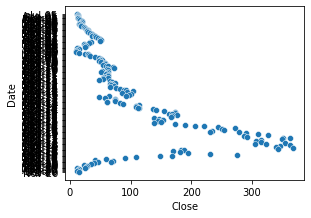

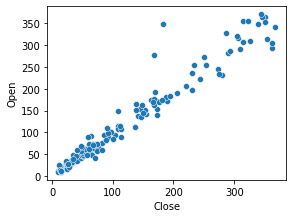

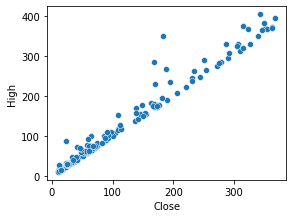

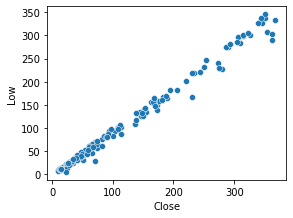

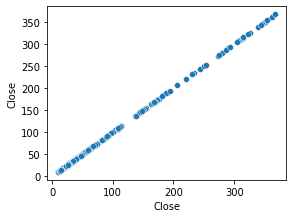

In [75]:
num_it2 =1
for i in df.columns:
  plt.figure(figsize = (30, 30))
  plt.subplot(8,6,num_it2)
  sns.scatterplot(x = 'Close',y =i,data=df)
  num_it2 +=1
plt.show()

In [76]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

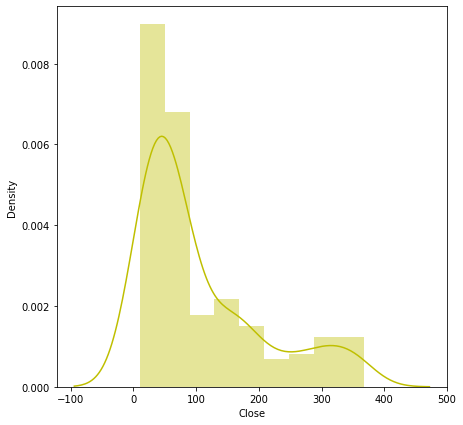

In [130]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

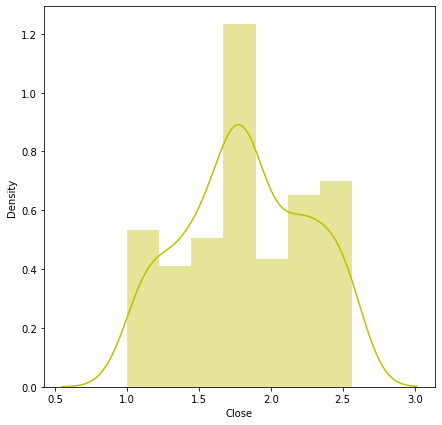

In [131]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

In [132]:
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close', 'Year', 'Month'], dtype='object')

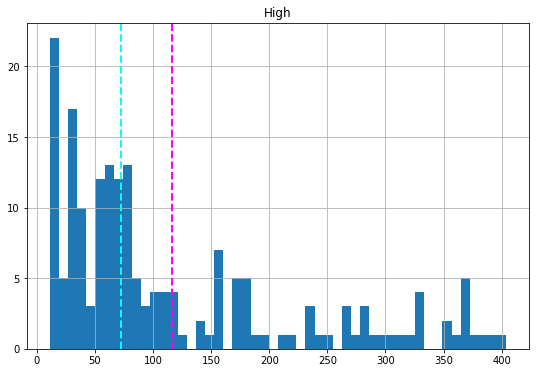

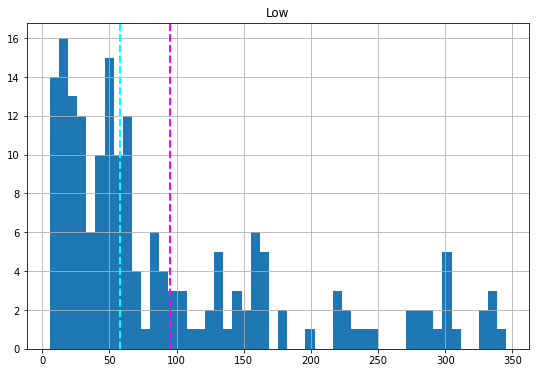

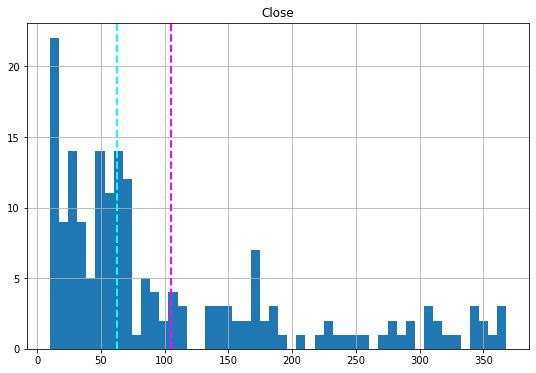

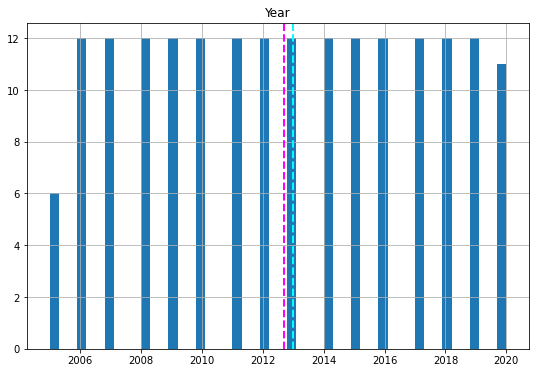

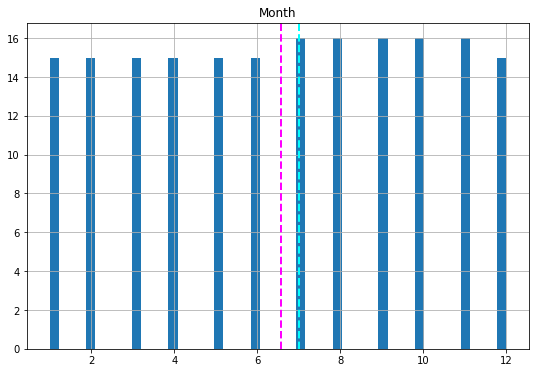

In [134]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [77]:
df['Date'] =df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [79]:
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)

In [80]:
df.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Year    185 non-null    int64         
 6   Month   185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 10.2 KB


In [86]:
df.drop('Date',axis=1,inplace=True)

In [87]:
df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


In [96]:
df[df['Month'] ==1]

,Open,High,Low,Close,Year,Month
6,13.68,17.16,13.58,15.33,2006,1
18,27.40,34.16,27.00,30.16,2007,1
30,49.99,55.56,30.24,50.54,2008,1
42,15.28,18.34,11.48,12.24,2009,1
54,53.60,57.58,46.42,49.84,2010,1
66,62.98,63.54,49.39,52.59,2011,1
78,47.92,66.50,46.11,65.99,2012,1
90,93.20,107.00,93.20,104.41,2013,1
102,74.74,76.35,60.80,61.59,2014,1
114,154.40,179.00,150.47,172.50,2015,1


In [98]:
dependent_variable = 'Close'

In [100]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [102]:
# Create the data of independent variables
x = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [103]:
df[independent_variables]

,Low,High,Open,Year,Month
0,11.25,14.00,13.00,2005,7
1,12.55,14.88,12.58,2005,8
2,12.27,14.87,13.48,2005,9
3,12.40,14.47,13.20,2005,10
4,12.88,13.88,13.35,2005,11
...,...,...,...,...,...
180,11.10,28.30,25.60,2020,7
181,11.85,17.16,12.00,2020,8
182,12.75,15.34,14.30,2020,9
183,12.11,14.01,13.30,2020,10


In [106]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [107]:
x_train[0:10]

array([[1.3400e+02, 1.5500e+02, 1.4208e+02, 2.0140e+03, 1.2000e+01],
       [1.6020e+01, 2.0950e+01, 1.6200e+01, 2.0060e+03, 3.0000e+00],
       [5.7710e+01, 1.0040e+02, 9.2400e+01, 2.0130e+03, 7.0000e+00],
       [4.0950e+01, 7.2550e+01, 5.9500e+01, 2.0190e+03, 9.0000e+00],
       [9.9400e+00, 1.7510e+01, 1.0040e+01, 2.0090e+03, 4.0000e+00],
       [4.4800e+01, 7.8940e+01, 4.9200e+01, 2.0130e+03, 9.0000e+00],
       [4.7300e+01, 5.2060e+01, 4.7800e+01, 2.0100e+03, 3.0000e+00],
       [3.5020e+01, 4.1040e+01, 3.5980e+01, 2.0070e+03, 7.0000e+00],
       [3.0240e+01, 5.5560e+01, 4.9990e+01, 2.0080e+03, 1.0000e+00],
       [1.1100e+01, 2.8300e+01, 2.5600e+01, 2.0200e+03, 7.0000e+00]])

In [109]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [110]:
x_train[0:10]

array([[0.37784968, 0.37416306, 0.37409338, 0.6       , 1.        ],
       [0.03079865, 0.02218721, 0.0174524 , 0.06666667, 0.18181818],
       [0.15343433, 0.23079953, 0.23334089, 0.53333333, 0.54545455],
       [0.10413296, 0.15767362, 0.14012919, 0.93333333, 0.72727273],
       [0.01291366, 0.01315479, 0.        , 0.26666667, 0.27272727],
       [0.11545816, 0.17445188, 0.11094742, 0.53333333, 0.72727273],
       [0.12281218, 0.10387292, 0.10698096, 0.33333333, 0.18181818],
       [0.08668922, 0.07493764, 0.07349275, 0.13333333, 0.54545455],
       [0.07262833, 0.11306289, 0.11318563, 0.2       , 0.        ],
       [0.01632593, 0.04148615, 0.04408432, 1.        , 0.54545455]])

In [112]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [113]:
regressor.intercept_

10.99514066646492

In [114]:
regressor.coef_

array([ 343.27674963,  177.78608317, -154.7127103 ,   -0.88664802,
         -4.30510043])

In [116]:
y_pred_train = regressor.predict(x_train)

In [117]:
y_train

array([154.57,  20.08,  64.76,  41.45,  15.45,  57.5 ,  50.97,  37.93,
        50.54,  11.95,  85.71,  13.15,  34.55,  28.63, 326.14,  73.46,
       354.45,  25.32,  47.31,  54.5 , 322.25,  12.26, 113.89,  33.51,
       114.33,  59.5 , 346.2 ,  67.83,  97.49, 145.92,  43.48,  92.84,
       108.38, 149.38,  14.37, 100.28,  70.3 ,  13.3 ,  53.83,  74.02,
       188.73,  10.26,  18.03, 104.41,  55.61,  26.85, 108.7 , 176.52,
       136.83,  48.65, 350.  ,  27.95,  40.99, 151.82,  92.2 ,  61.21,
       206.39,  15.03,  61.02,  33.45,  31.93,  65.97,  17.84, 290.56,
        35.98,  14.67, 137.9 ,  28.14,  22.78,  65.99,  82.7 ,  50.57,
        73.74,  54.49,  12.99,  12.42, 181.75,  15.33,  61.98,  62.9 ,
        72.85, 234.28,  16.16, 292.37, 183.45,  18.46,  12.46,  94.5 ,
       188.05,  25.12,  15.62, 168.6 ,  61.59,  22.85,  57.1 ,  62.54,
        13.42, 165.74, 315.05,  12.24,  88.14, 243.44, 169.65,  26.97,
        24.13, 272.56,  53.41, 351.15, 172.91,  31.13,  46.18, 172.5 ,
      

In [119]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [120]:
#Predicted profit on the test data
y_pred

array([ 33.24660656, 139.14647152,  42.14946258, 140.3310661 ,
        66.62617609,  35.03862349, 230.57365927,  20.18443036,
        13.60632884, 216.21129327, 301.811064  ,  86.91943961,
       152.12135389,  60.09747496, 342.6775925 , 261.86793573,
        73.41638991,  28.47050778, 262.79796869,  53.91989236,
        12.04084474, 117.50518108, 147.45252249,  59.82665459,
       218.08610087,  46.31232733, 249.2184523 ,  13.67647759,
       108.40263626,  55.53052904, 368.18901019, 339.73125906,
        72.7519087 , 169.25725296,  39.44868981,  50.85945893,
       260.85138375])

In [121]:
# Actual profits on test data
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [122]:
mean_squared_error(y_test, y_pred)

80.56653535374942

In [123]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

6.271862353265431

In [124]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

8.975886326917772

In [125]:
r2_score(y_train, y_pred_train)

0.9956465282860846

In [126]:
r2_score(y_test, y_pred)

0.9928422855965229